In [57]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [58]:
# Carregando o dataset

data = pd.read_csv('/kc_house_data.csv')

print( data.columns) # aqui eu verifico todas as colunas do dataset

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [59]:
# Vamos garantir que o formato date é um datetime

data['date'] = pd.to_datetime( data['date'], format='%Y-%m-%d' )

# 1. Crie uma nova coluna chamada: “dormitory_type”
- Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
- Se o valor da coluna “bedrooms” for igual a 2 => ‘apartament’
- Se o valor da coluna “bedrooms” for maior que 2 => ‘house’.


In [60]:
data['dormitory_type'] = data['bedrooms'].apply( lambda x: 'studio' if x == 1 else
                                                           'apartament' if x == 2 else 
                                                           'house' if x > 2 else 'NA' )
        


In [61]:
# Verifindo se a coluna foi criada corretamente

data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dormitory_type
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,house
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,house
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,apartament
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,house
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,house


# 1.1. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.

In [62]:
print(data.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'dormitory_type'],
      dtype='object')


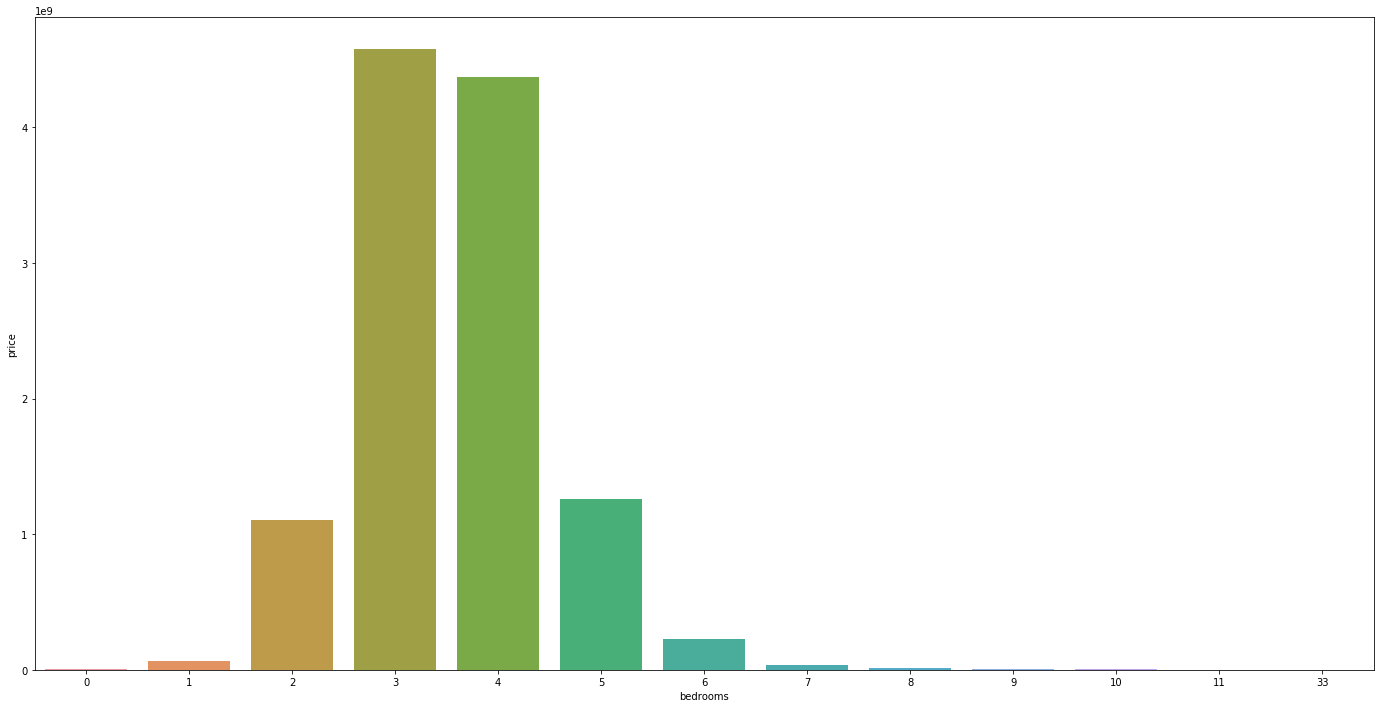

In [63]:
# Sempre atento a: qual a operação (no caso é soma) e qual o filtro ( no caso numero de quartos).

# melhorando o tamanho do gráfico
plt.figure( figsize=(24, 12))


df = data[['price', 'bedrooms']]. groupby( 'bedrooms' ).sum().reset_index()

# Usando a lib seaborn

sns.barplot( x='bedrooms', y='price', data=df)

# 1.2. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.

In [69]:
print(df.columns)

Index(['dormitory_type', 'price'], dtype='object')


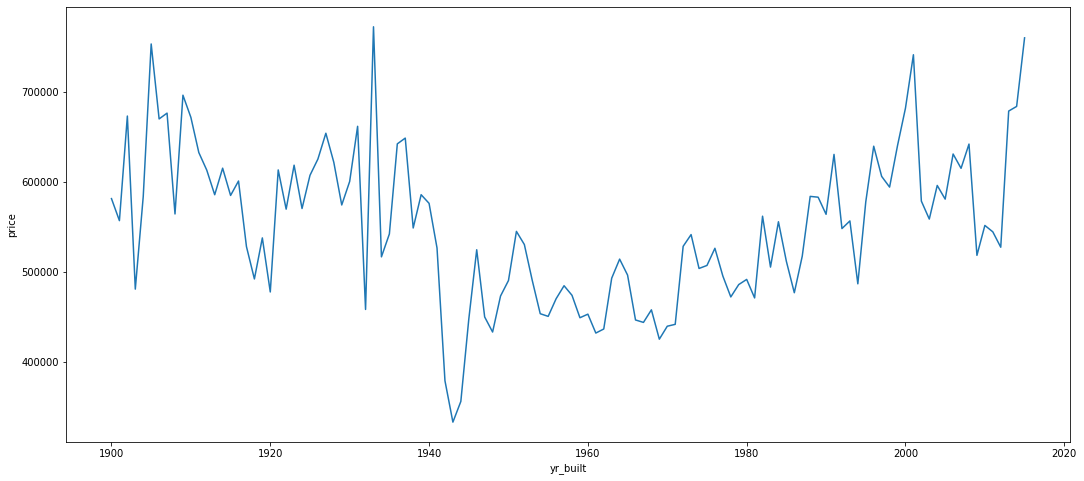

In [74]:
plt.figure( figsize=(18,8))
df = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
sns.lineplot( x='yr_built', y='price', data=df);

# 1.3. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.

In [72]:
# Verificando com o data.columns sempre depois de usar o groupby, entendi que depois q uso o grupby, meu datase passa a 
# ter apensas as colunas que estão no gropuby e não mais todas as colunas como no início.


print(df.columns)

Index(['yr_built', 'price'], dtype='object')


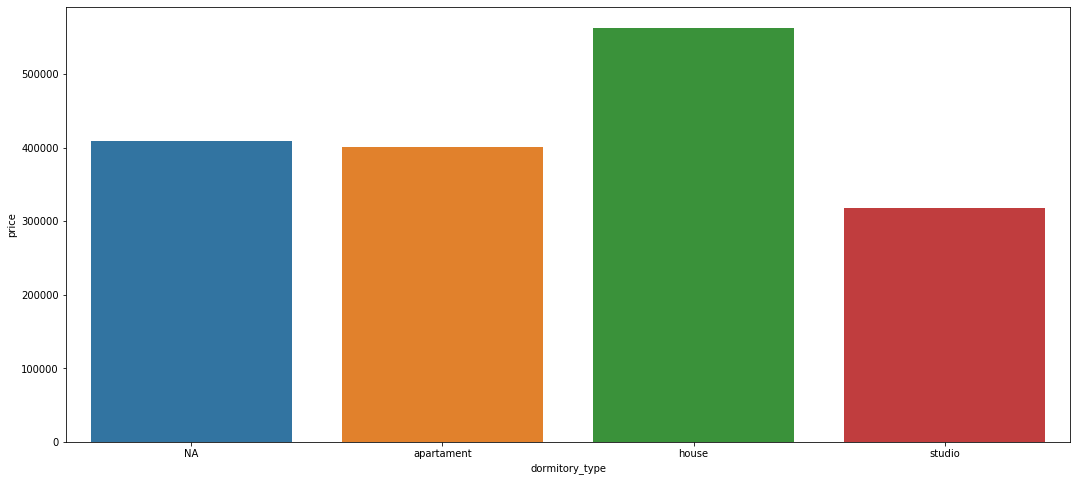

In [80]:
plt.figure( figsize=(18,8))

df = data[['price', 'dormitory_type']].groupby( 'dormitory_type' ).mean().reset_index()

sns.barplot( x='dormitory_type', y='price', data=df );